### Read data and pre-process it

In [167]:
import warnings; 
warnings.simplefilter('ignore')

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('data/Prophet_Data.csv')

In [139]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [140]:
df.columns

Index(['Time Date', 'Product', 'Store', 'Value'], dtype='object')

In [141]:
df['Year'] = df['Time Date'].apply(lambda x:str(x)[-4:])

In [142]:
df['Month'] = df['Time Date'].apply(lambda x:str(x)[-6:-4:])

In [143]:
df['Day'] = df['Time Date'].apply(lambda x:str(x)[:-6])

In [144]:
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

- Prophet needs the date/time column to be "ds" and the target to be "y"

In [145]:
df['ds'] = pd.to_datetime(df['ds'])
df.rename(columns={'Value': 'y'}, inplace=True)

In [146]:
df.head()

,Time Date,Product,Store,y,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [147]:
df.drop(['Time Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Product  1080 non-null   int64         
 1   Store    1080 non-null   object        
 2   y        1080 non-null   float64       
 3   ds       1080 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.9+ KB


In [149]:
df.describe()

,Product,y
count,1080.0,1080.000000
mean,2667437.0,4048.117478
std,0.0,1439.945783
min,2667437.0,2042.813500
25%,2667437.0,2632.498599
50%,2667437.0,4256.000000
75%,2667437.0,5288.248910
max,2667437.0,8147.739600


In [150]:
df.head()

,Product,Store,y,ds
0,2667437,QLD_CW_ST0203,2926.000,2018-01-01
1,2667437,QLD_CW_ST0203,2687.531,2018-01-02
2,2667437,QLD_CW_ST0203,2793.000,2018-01-03
3,2667437,QLD_CW_ST0203,2394.000,2018-01-04
4,2667437,QLD_CW_ST0203,2660.000,2018-01-05


In [151]:
print(df['Store'].unique())
print(df['Product'].unique())

['QLD_CW_ST0203']
[2667437]


- Since there is only 1 product in 1 store, we can focus on the value and date column only

In [152]:
df.drop(['Product', 'Store'], axis=1, inplace=True)

In [153]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


### Create model

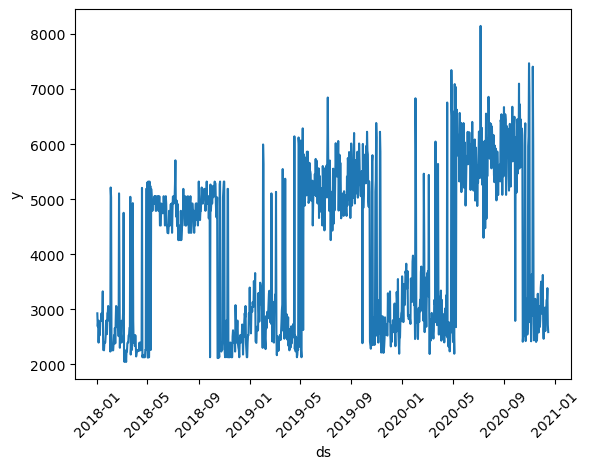

In [154]:
sns.lineplot(data=df, x='ds', y='y')
plt.xticks(rotation=45)
plt.show()

- Daily seasonality is set to true cause we we have data for everyday

In [155]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [156]:
base_model = Prophet(interval_width=0.95, daily_seasonality=True)
fit_model = base_model.fit(df)

20:51:51 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] done processing


### Make predictions

- Make predictions for the next 100 days

In [165]:
future = fit_model.make_future_dataframe(periods=160,freq='D')
forecast = fit_model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,987.418214,4156.294943,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,756.861170,4062.239117,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,843.709329,3934.324729,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,743.156762,4060.722955,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,950.696956,4083.481568,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


- yhat is the predicted value, the other values are also important to understand the error space, trends, and upper/lower bounds

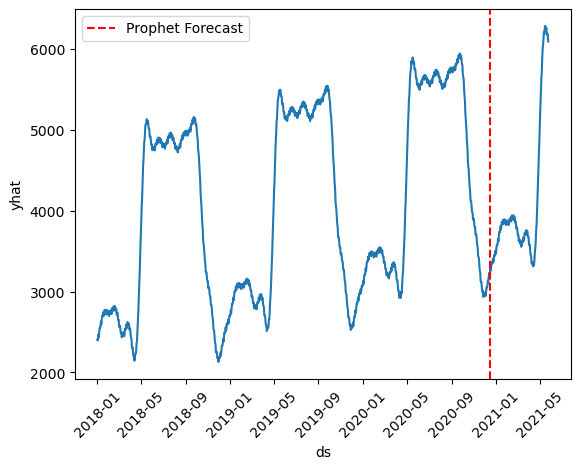

In [166]:
sns.lineplot(data=forecast, x='ds', y='yhat')
plt.axvline(pd.Timestamp('2020-12-16'), color='red', linestyle='--', label='Prophet Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()

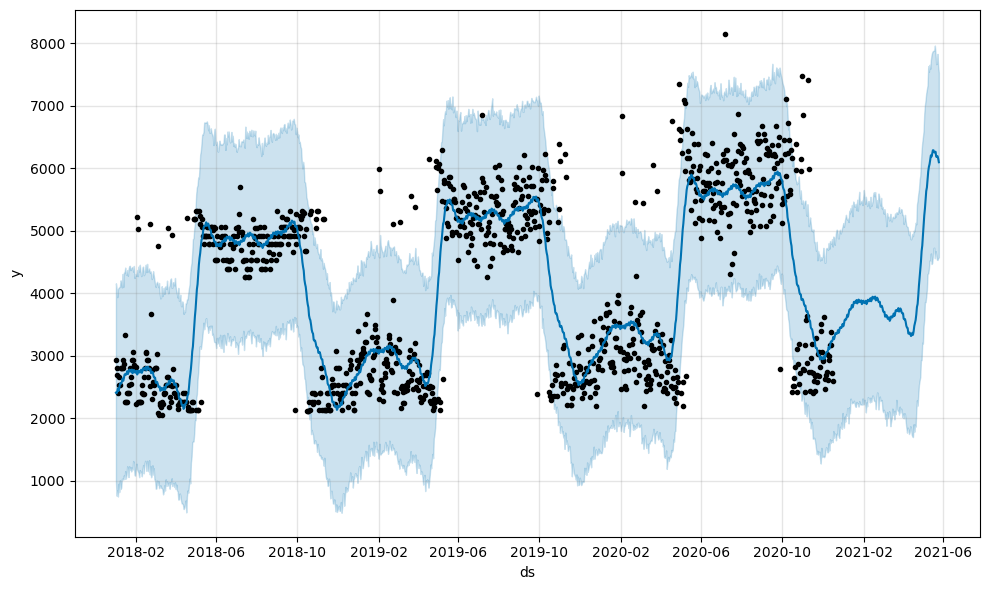

In [168]:
forecase_plot = fit_model.plot(forecast)

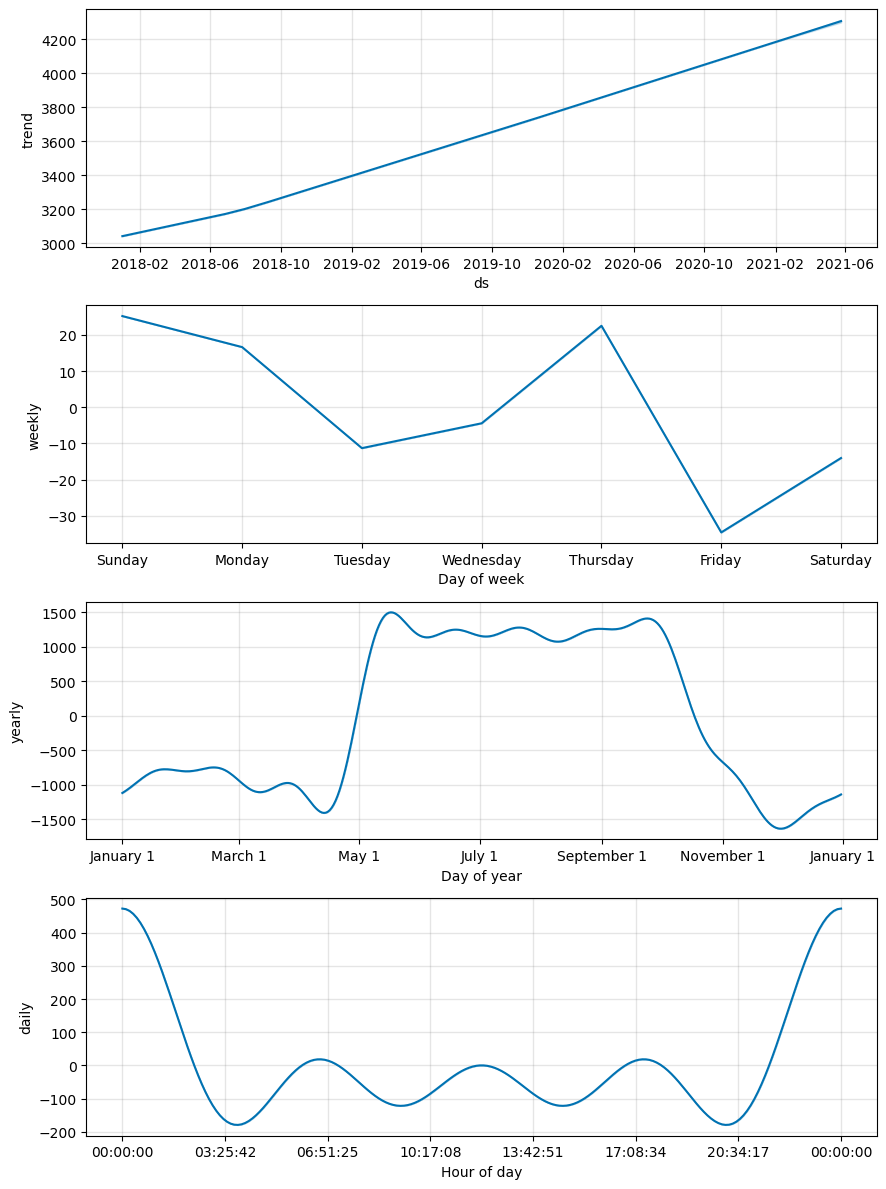

In [170]:
trend_plot = fit_model.plot_components(forecast)